In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ppscore
import ppscore as pps

In [2]:
# Load dataset
df = pd.read_csv('/content/adult_with_headers.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Task 1: Data Exploration and Preprocessing
print("Summary Statistics:")
print(df.describe())
print("\nData Types:")
print(df.dtypes)

Summary Statistics:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Data Types:
age                int64
workc

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [6]:
# Handle missing values (example: fill with median for numerical columns)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df[numerical_cols]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [10]:
# Task 2: Scaling Techniques
scaler_standard = StandardScaler()
scaler_standard
scaler_minmax = MinMaxScaler()
scaler_minmax

MinMaxScaler()

In [12]:
# Apply Standard Scaling
scaled_standard = scaler_standard.fit_transform(df[numerical_cols])
df_standard_scaled = pd.DataFrame(scaled_standard, columns=numerical_cols)
df_standard_scaled

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [14]:
# Apply Min-Max Scaling
scaled_minmax = scaler_minmax.fit_transform(df[numerical_cols])
df_minmax_scaled = pd.DataFrame(scaled_minmax, columns=numerical_cols)
df_minmax_scaled

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [16]:
# Task 3: Encoding Techniques
# One-Hot Encoding for categorical variables with < 5 unique values
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].nunique() < 5:
        df = pd.get_dummies(df, columns=[col], prefix=[col], drop_first=True)
# Update categorical_cols to reflect changes after one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns  #This line is added.
categorical_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'native_country'],
      dtype='object')

In [17]:
# Label Encoding for categorical variables with >= 5 unique values
le = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() >= 5:
        df[col] = le.fit_transform(df[col])

In [18]:
# Task 4: Feature Engineering
# Create new features (e.g., age group and work hours category)
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Adult', 'Senior', 'Elder'])
df['work_hours_category'] = pd.cut(df['hours_per_week'], bins=[0, 20, 40, 60, 100], labels=['Part-time', 'Full-time', 'Overtime', 'Extreme'])

In [19]:
# Apply log transformation to skewed feature (e.g., capital-gain)
df['capital-gain'] = np.log1p(df['capital_gain'])

In [20]:
# Task 5: Feature Selection
# Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df[numerical_cols])
df = df[outliers == 1]

In [21]:
# Calculate PPS score
pps_matrix = pps.matrix(df)[['x', 'y', 'ppscore']]
pps_matrix = pps_matrix[pps_matrix['ppscore'] > 0.1]

In [22]:
# Display PPS matrix
print("\nPPS Matrix:")
print(pps_matrix)


PPS Matrix:
                       x                    y   ppscore
0                    age                  age  1.000000
5                    age       marital_status  0.168563
15                   age            age_group  1.000000
19             workclass            workclass  1.000000
24             workclass           occupation  0.102855
38                fnlwgt               fnlwgt  1.000000
51                fnlwgt            age_group  0.102534
57             education            education  1.000000
58             education        education_num  1.000000
75         education_num            education  1.000000
76         education_num        education_num  1.000000
90        marital_status                  age  0.205311
95        marital_status       marital_status  1.000000
97        marital_status         relationship  0.152769
105       marital_status            age_group  0.177190
109           occupation            workclass  0.149272
112           occupation        edu

<ipython-input-23-fce77f2b6b10>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


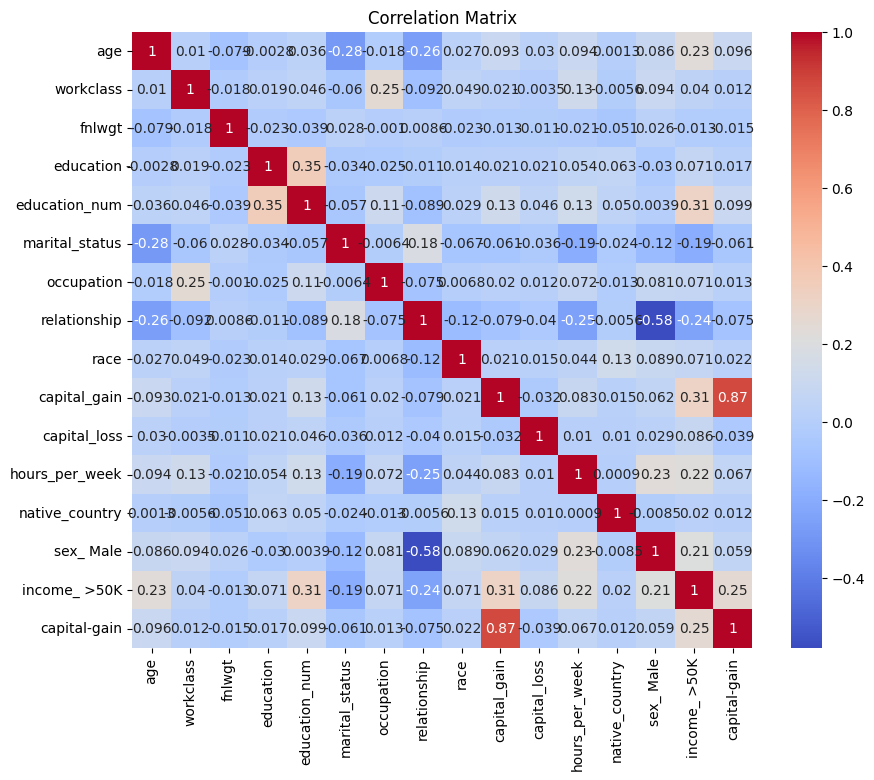

In [23]:
# Correlation matrix for comparison
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()